## Evren Salih - Capstone Project
In my project, I'll look into how different physical measurements and body fat percentage relate to one another. I'll use this information to create a model that can accurately estimate someone's body fat percentage based on a set of features. This model will be put into use as a GUI function, and I'll then assess how accurate it is.

## 0.Overview
The percentage of a person's entire mass that is made up of fat is known as their body fat percentage. It is a helpful indicator of someone's level of fitness and can be used to determine whether someone is at risk for any weight-related health conditions. A healthy body fat percentage cannot be defined because it depends on many factors such as the sex and age of the individual.

The Siri equation, which takes into account body density as a variable, is the approach that is most frequently used to calculate body fat percentage. To determine body density, you must immerse yourself into a water bath and find the volume displacement. This calls for cutting-edge technology that is expensive and difficult for most people to use. Any other method that is easier to use isn't typically accurate because it tends to use a formula that doesn't consider individual cases, for example BMI, which uses the height and weight of an individual, would consider someone who is toned and has a lot of muscle mass as overweight.

The majority of people will find it much simpler and more reliable to calculate body fat percentage at home. It will make it easier for individuals to understand where they stand in terms of their fitness, and it can assist them in adapting their workout routines to meet their fitness goals. It can also be used to determine whether someone needs to be concerned about the risk of developing any weight-related health conditions.

I'm going to develop a model that can accurately estimate a person's body fat percentage using a few straightforward measurements, and I'll put this model into a GUI function so that it can be utilised easily.

## 1.Importing modules and datasets
I start by importing some basic modules and reading in the body fat dataset I acquired from Kaggle, as is standard. As more modules are required, I will continue to add them to this notebook.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('bodyfat.csv')

## 2.Data cleaning and EDA
At this stage, we'll determine which columns are essential and whether any missing data needs to be handled. The next step is to investigate the data, keeping an eye out for potential outliers and learning more about the relationships between the columns.

In [4]:
# A quick glance at what our data looks like.
df

Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  \
0     1.0708     12.3   23  154.25   67.75  36.2   93.1     85.2   94.5   
1     1.0853      6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   
2     1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   
3     1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   
4     1.0340     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   
..       ...      ...  ...     ...     ...   ...    ...      ...    ...   
247   1.0736     11.0   70  134.25   67.00  34.9   89.2     83.6   88.8   
248   1.0236     33.6   72  201.00   69.75  40.9  108.5    105.0  104.5   
249   1.0328     29.3   72  186.75   66.00  38.9  111.1    111.5  101.7   
250   1.0399     26.0   72  190.75   70.50  38.9  108.3    101.3   97.8   
251   1.0271     31.9   74  207.50   70.00  40.8  112.4    108.5  107.1   

     Thigh  Knee  Ankle  Biceps  Forearm  Wrist  
0     59.0  37.3   21.9    32.0     27.4   17.1  
1     58.7  37.3   23.4    30.5     28.9   18.2  
2     59.6  38.9   24.0    28.8     25.2   16.6  
3     60.1  37.3   22.8    32.4     29.4   18.2  
4     63.2  42.2   24.0    32.2     27.7   17.7  
..     ...   ...    ...     ...      ...    ...  
247   49.6  34.8   21.5    25.6     25.7   18.5  
248   59.6  40.8   23.2    35.2     28.6   20.1  
249   60.3  37.3   21.5    31.3     27.2   18.0  
250   56.0  41.6   22.7    30.5     29.4   19.8  
251   59.3  42.2   24.6    33.7     30.0   20.9  

[252 rows x 15 columns]

In [5]:
# The datatypes are appropriate for what the columns are meant to represent.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [6]:
# Conveniently we have no missing data.
df.isnull().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

In [7]:
# I'm not really used to working in lbs for weight, so I will convert the weight data to kg.
# I'd also much prefer to measure height in cm instead of inches, so I will convert that too.
df['Weight'] = df['Weight']*0.45359237
df['Height'] = df['Height']*2.54
df[['Weight','Height']].head(10)

Weight   Height
0  69.966623  172.085
1  78.584878  183.515
2  69.853225  168.275
3  83.801190  183.515
4  83.574394  180.975
5  95.367796  189.865
6  82.100219  177.165
7  79.832257  184.150
8  86.636143  187.960
9  89.924687  186.690

In [8]:
# I'm going to rename the columns so that they contain their units.
# Db is the unit of measure for body density, which in this case was calculated using total body mass divided by volume. When I acquired the data there wasn't any information on what units were used to calculate body density, hence why I haven't labelled the column as kg/l or lbs/ml etc. This isn't an issue at all because any correlations are unaffected by conversions, and we don't plan to use density as a feature.
df = df.rename(columns={'BodyFat':'BodyFat(%)','Age':'Age(years)','Weight':'Weight(kg)','Density':'Density(Db)'})

for column in df.iloc[:,4:15]:
    df = df.rename(columns={column:column+'(cm)'})

df

Density(Db)  BodyFat(%)  Age(years)  Weight(kg)  Height(cm)  Neck(cm)  \
0         1.0708        12.3          23   69.966623     172.085      36.2   
1         1.0853         6.1          22   78.584878     183.515      38.5   
2         1.0414        25.3          22   69.853225     168.275      34.0   
3         1.0751        10.4          26   83.801190     183.515      37.4   
4         1.0340        28.7          24   83.574394     180.975      34.4   
..           ...         ...         ...         ...         ...       ...   
247       1.0736        11.0          70   60.894776     170.180      34.9   
248       1.0236        33.6          72   91.172066     177.165      40.9   
249       1.0328        29.3          72   84.708375     167.640      38.9   
250       1.0399        26.0          72   86.522745     179.070      38.9   
251       1.0271        31.9          74   94.120417     177.800      40.8   

     Chest(cm)  Abdomen(cm)  Hip(cm)  Thigh(cm)  Knee(cm)  Ankle(cm)  \
0         93.1         85.2     94.5       59.0      37.3       21.9   
1         93.6         83.0     98.7       58.7      37.3       23.4   
2         95.8         87.9     99.2       59.6      38.9       24.0   
3        101.8         86.4    101.2       60.1      37.3       22.8   
4         97.3        100.0    101.9       63.2      42.2       24.0   
..         ...          ...      ...        ...       ...        ...   
247       89.2         83.6     88.8       49.6      34.8       21.5   
248      108.5        105.0    104.5       59.6      40.8       23.2   
249      111.1        111.5    101.7       60.3      37.3       21.5   
250      108.3        101.3     97.8       56.0      41.6       22.7   
251      112.4        108.5    107.1       59.3      42.2       24.6   

     Biceps(cm)  Forearm(cm)  Wrist(cm)  
0          32.0         27.4       17.1  
1          30.5         28.9       18.2  
2          28.8         25.2       16.6  
3          32.4         29.4       18.2  
4          32.2         27.7       17.7  
..          ...          ...        ...  
247        25.6         25.7       18.5  
248        35.2         28.6       20.1  
249        31.3         27.2       18.0  
250        30.5         29.4       19.8  
251        33.7         30.0       20.9  

[252 rows x 15 columns]

In [9]:
# Our stats for each column.
df.describe()

Density(Db)  BodyFat(%)  Age(years)  Weight(kg)  Height(cm)  \
count   252.000000  252.000000  252.000000  252.000000  252.000000   
mean      1.055574   19.150794   44.884921   81.158745  178.177976   
std       0.019031    8.368740   12.602040   13.330699    9.303654   
min       0.995000    0.000000   22.000000   53.750696   74.930000   
25%       1.041400   12.475000   35.750000   72.121187  173.355000   
50%       1.054900   19.200000   43.000000   80.059053  177.800000   
75%       1.070400   25.300000   54.000000   89.357697  183.515000   
max       1.108900   47.500000   81.000000  164.722069  197.485000   

         Neck(cm)   Chest(cm)  Abdomen(cm)     Hip(cm)   Thigh(cm)  \
count  252.000000  252.000000   252.000000  252.000000  252.000000   
mean    37.992063  100.824206    92.555952   99.904762   59.405952   
std      2.430913    8.430476    10.783077    7.164058    5.249952   
min     31.100000   79.300000    69.400000   85.000000   47.200000   
25%     36.400000   94.350000    84.575000   95.500000   56.000000   
50%     38.000000   99.650000    90.950000   99.300000   59.000000   
75%     39.425000  105.375000    99.325000  103.525000   62.350000   
max     51.200000  136.200000   148.100000  147.700000   87.300000   

         Knee(cm)   Ankle(cm)  Biceps(cm)  Forearm(cm)   Wrist(cm)  
count  252.000000  252.000000  252.000000   252.000000  252.000000  
mean    38.590476   23.102381   32.273413    28.663889   18.229762  
std      2.411805    1.694893    3.021274     2.020691    0.933585  
min     33.000000   19.100000   24.800000    21.000000   15.800000  
25%     36.975000   22.000000   30.200000    27.300000   17.600000  
50%     38.500000   22.800000   32.050000    28.700000   18.300000  
75%     39.925000   24.000000   34.325000    30.000000   18.800000  
max     49.100000   33.900000   45.000000    34.900000   21.400000

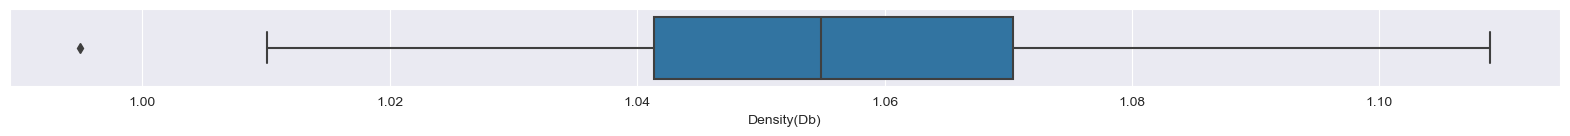

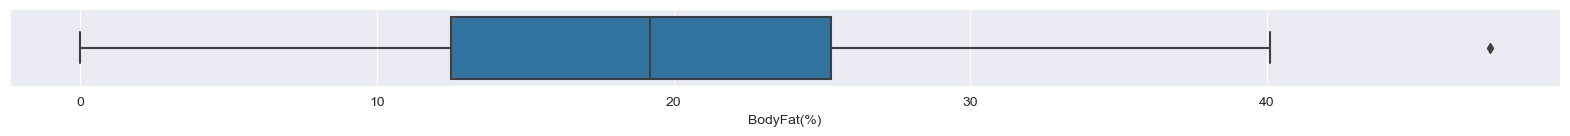

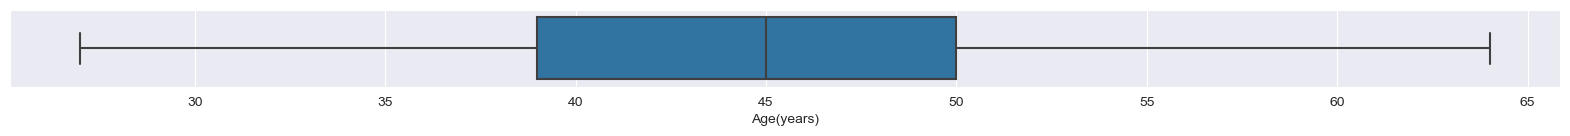

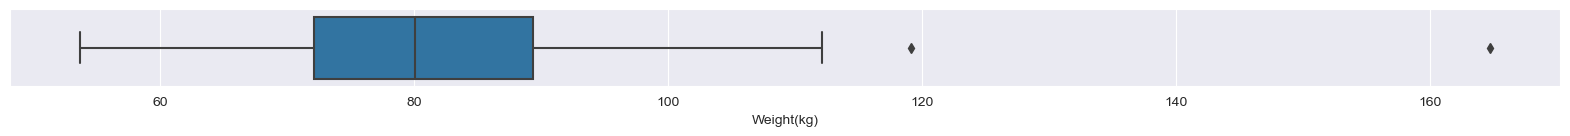

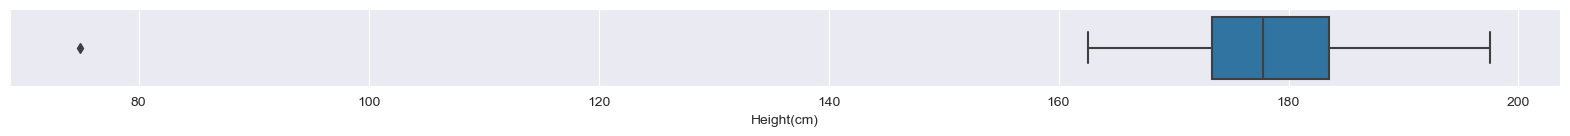

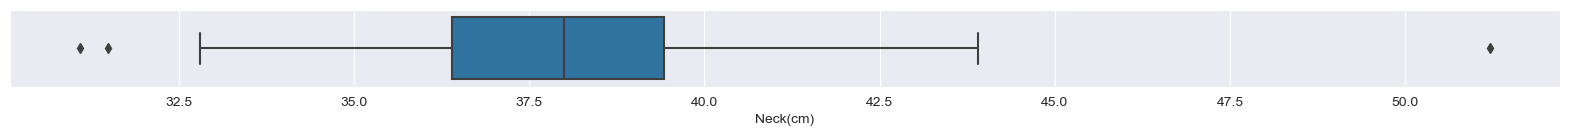

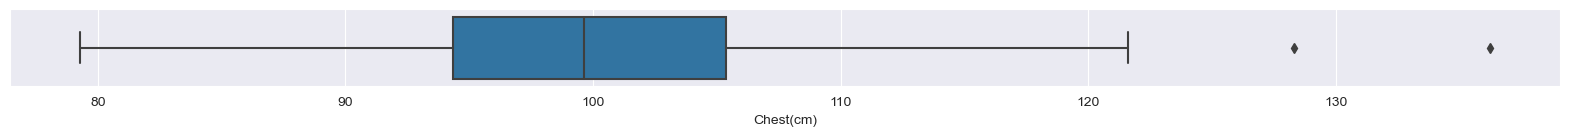

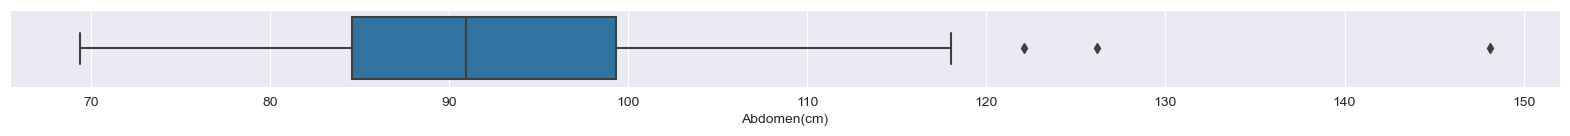

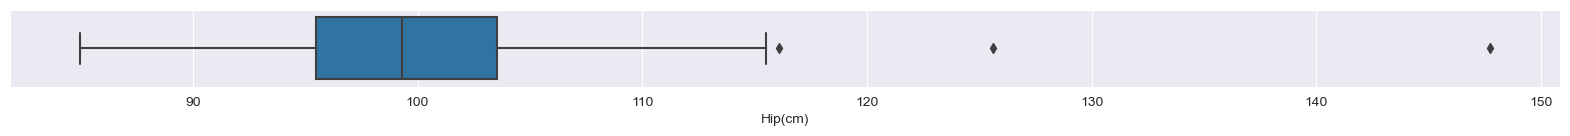

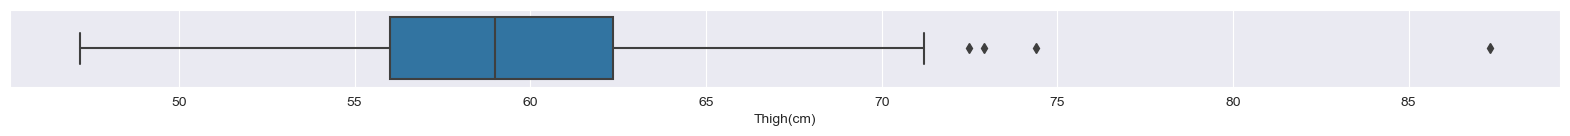

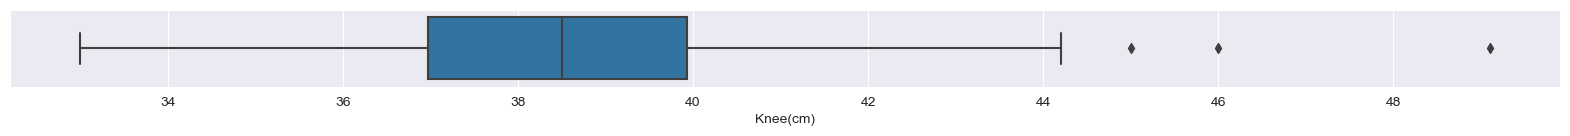

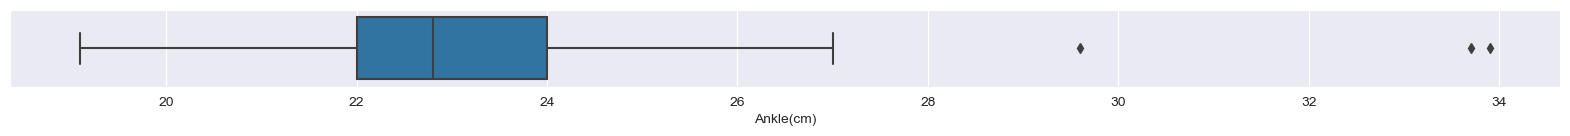

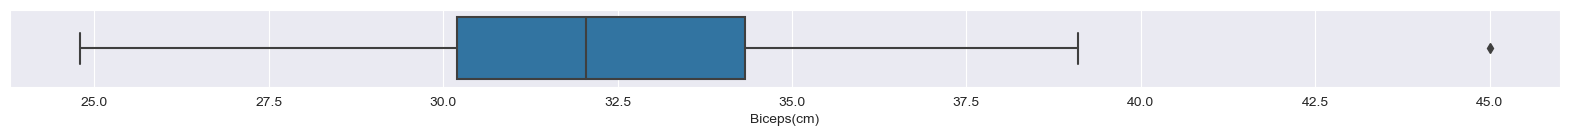

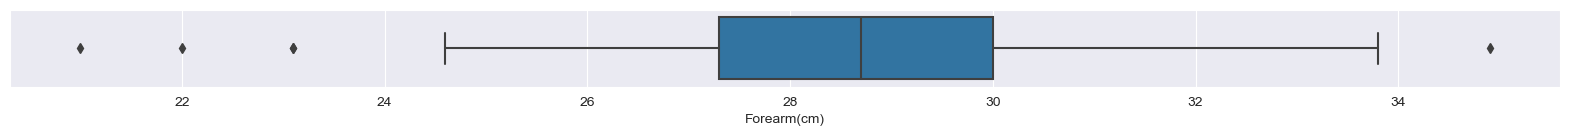

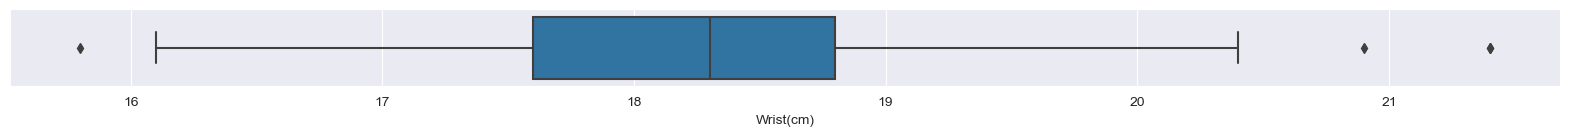

In [10]:
# I'm going to make box plots for every column so that we can visualise our quartiles and any outliers. We can observe that there are outliers in our data.
for column in df:
    plt.figure(figsize=(20,1))
    sns.boxplot(data=df[column],orient='h', x=df[column])
plt.show()

In [11]:
# I will replace outliers with mean for those columns.
def clean_outliers(df):
    df_clean = df.copy()
    for column in df:
        q1, q3 = np.percentile(df[column],[25,75])
        IQR = q3 - q1
        upper = q3 + 1.5*IQR
        lower = q1 - 1.5*IQR
        df_clean[column] = np.where((df[column] < lower) | (df[column] > upper), np.nan, df[column])
        mean = df_clean[column].mean()
        df_clean[column] = df_clean[column].fillna(mean)
    return df_clean

In [12]:
# Our cleaned dataset.
df = clean_outliers(df)
df

Density(Db)  BodyFat(%)  Age(years)  Weight(kg)  Height(cm)  Neck(cm)  \
0         1.0708        12.3        23.0   69.966623     172.085      36.2   
1         1.0853         6.1        22.0   78.584878     183.515      38.5   
2         1.0414        25.3        22.0   69.853225     168.275      34.0   
3         1.0751        10.4        26.0   83.801190     183.515      37.4   
4         1.0340        28.7        24.0   83.574394     180.975      34.4   
..           ...         ...         ...         ...         ...       ...   
247       1.0736        11.0        70.0   60.894776     170.180      34.9   
248       1.0236        33.6        72.0   91.172066     177.165      40.9   
249       1.0328        29.3        72.0   84.708375     167.640      38.9   
250       1.0399        26.0        72.0   86.522745     179.070      38.9   
251       1.0271        31.9        74.0   94.120417     177.800      40.8   

     Chest(cm)  Abdomen(cm)  Hip(cm)  Thigh(cm)  Knee(cm)  Ankle(cm)  \
0         93.1         85.2     94.5       59.0      37.3       21.9   
1         93.6         83.0     98.7       58.7      37.3       23.4   
2         95.8         87.9     99.2       59.6      38.9       24.0   
3        101.8         86.4    101.2       60.1      37.3       22.8   
4         97.3        100.0    101.9       63.2      42.2       24.0   
..         ...          ...      ...        ...       ...        ...   
247       89.2         83.6     88.8       49.6      34.8       21.5   
248      108.5        105.0    104.5       59.6      40.8       23.2   
249      111.1        111.5    101.7       60.3      37.3       21.5   
250      108.3        101.3     97.8       56.0      41.6       22.7   
251      112.4        108.5    107.1       59.3      42.2       24.6   

     Biceps(cm)  Forearm(cm)  Wrist(cm)  
0          32.0         27.4  17.100000  
1          30.5         28.9  18.200000  
2          28.8         25.2  16.600000  
3          32.4         29.4  18.200000  
4          32.2         27.7  17.700000  
..          ...          ...        ...  
247        25.6         25.7  18.500000  
248        35.2         28.6  20.100000  
249        31.3         27.2  18.000000  
250        30.5         29.4  19.800000  
251        33.7         30.0  18.203226  

[252 rows x 15 columns]

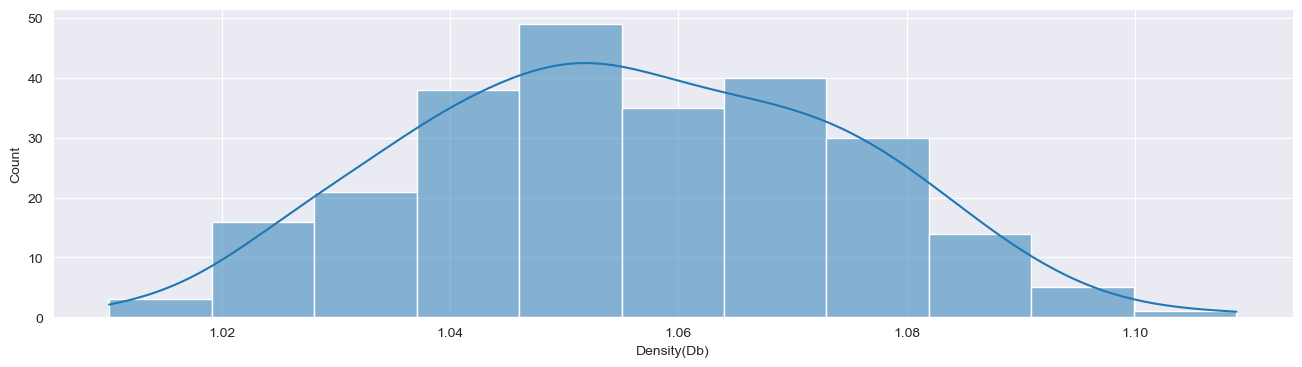

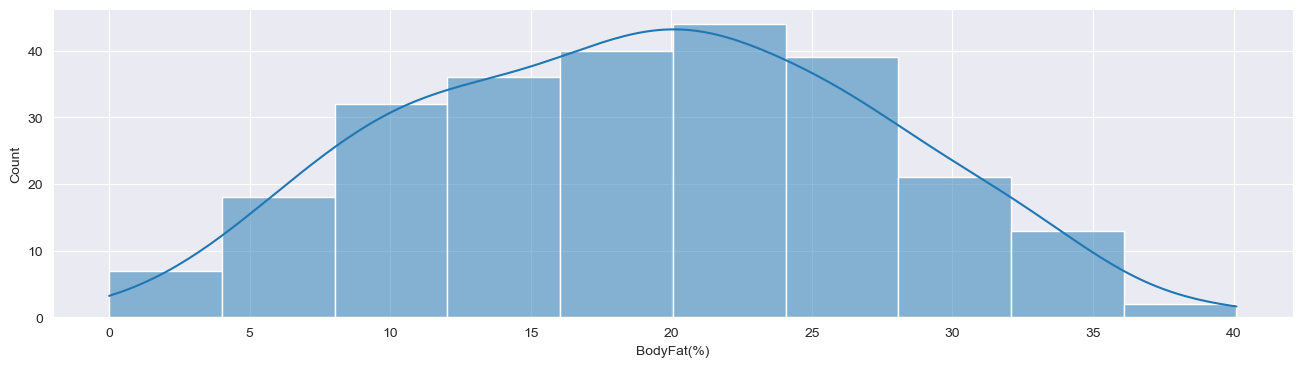

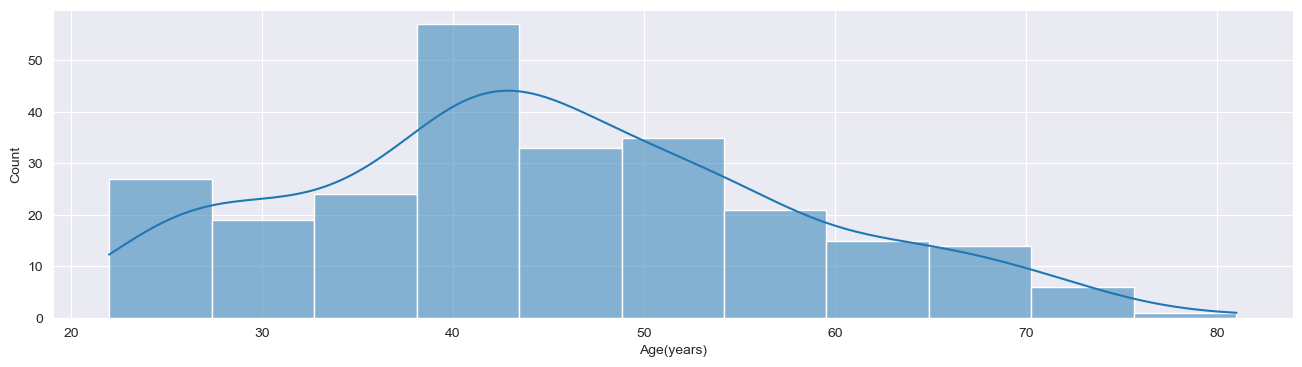

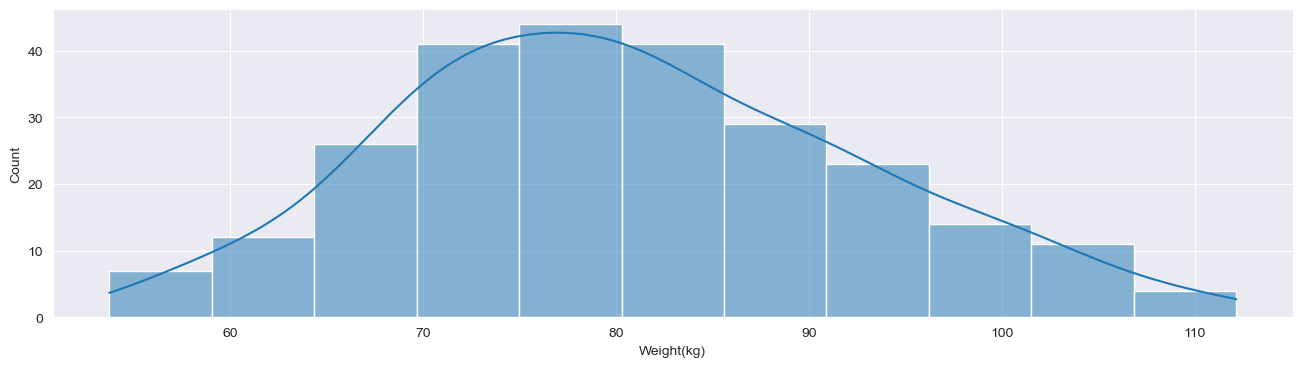

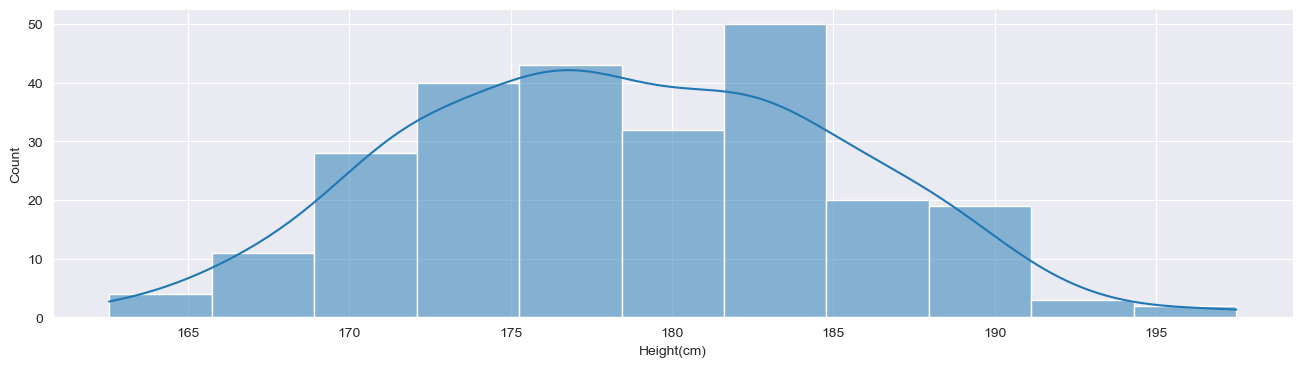

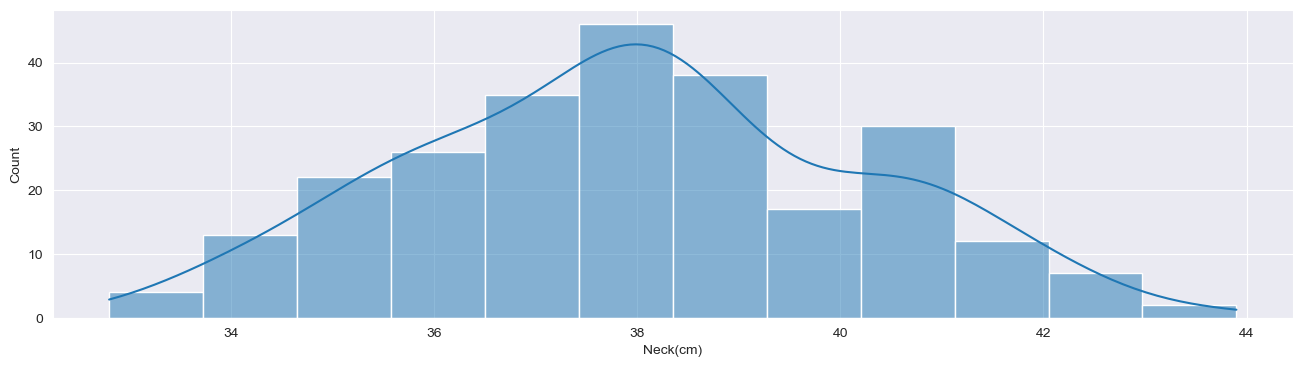

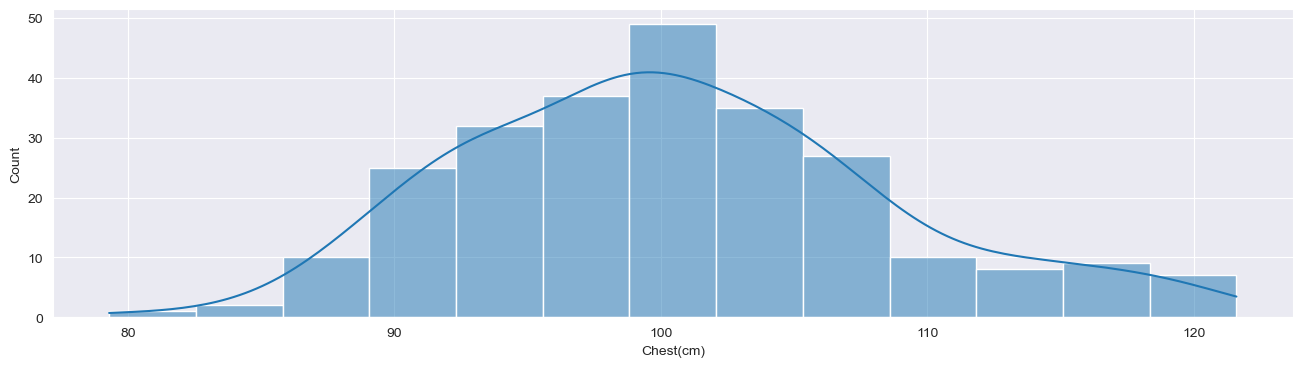

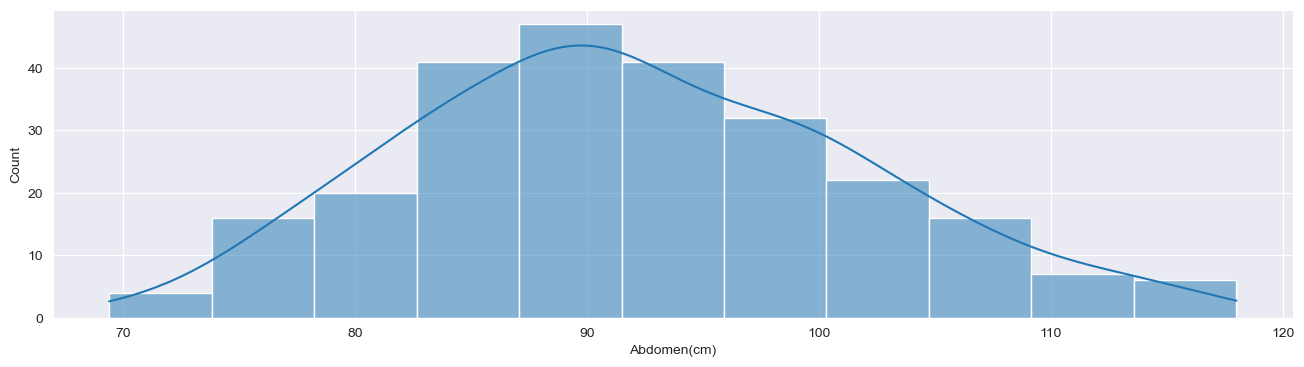

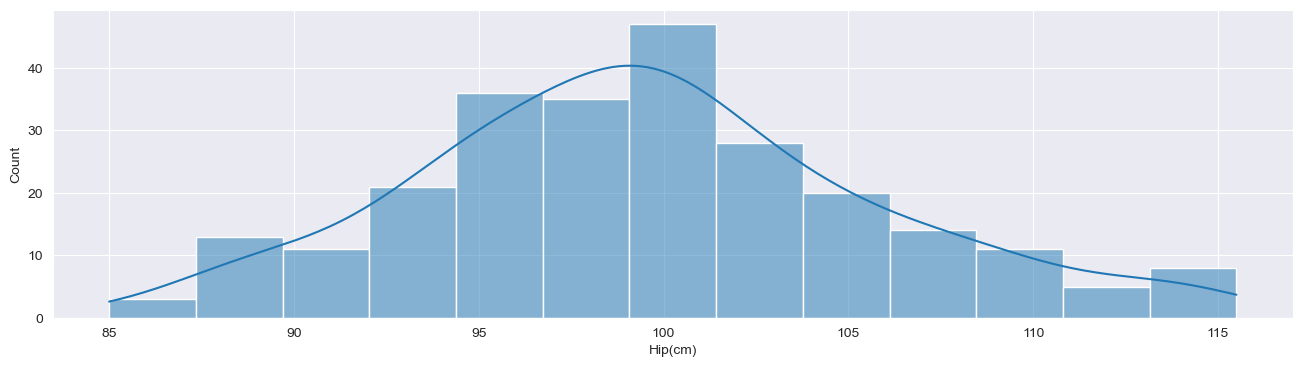

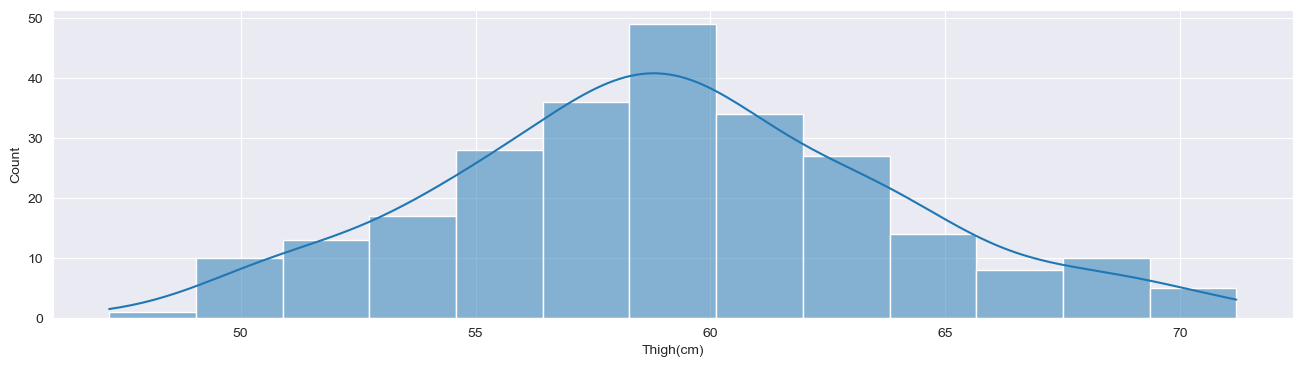

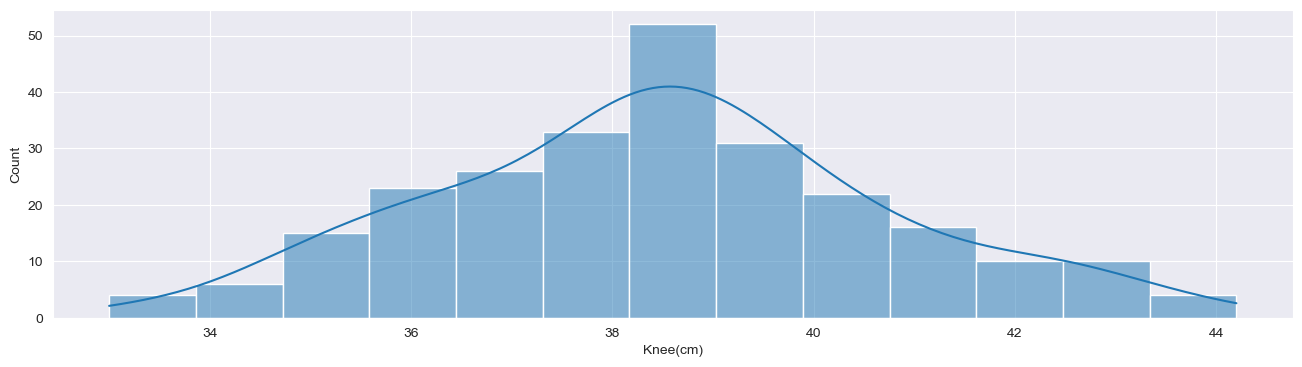

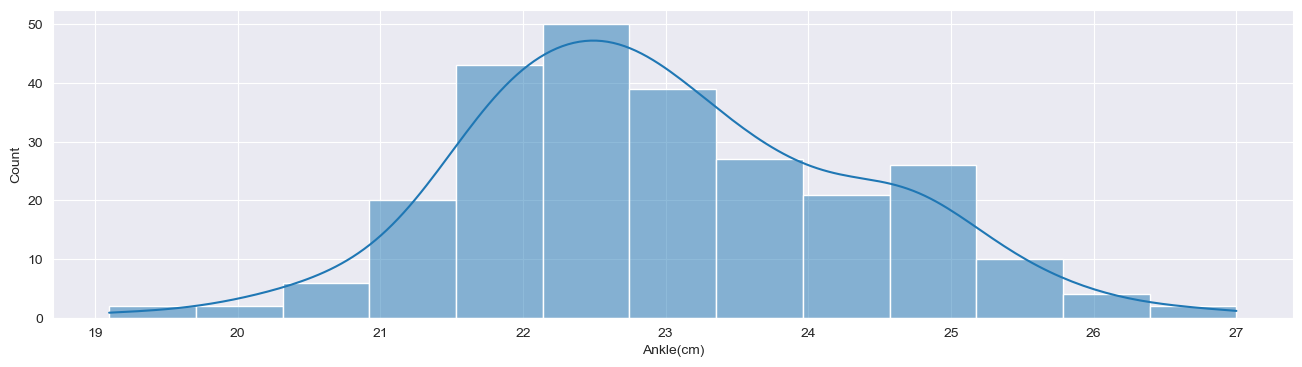

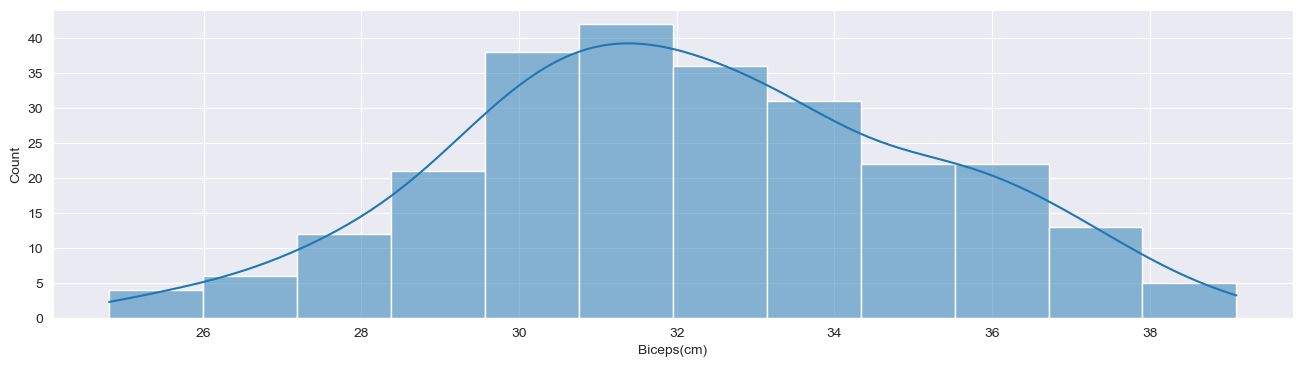

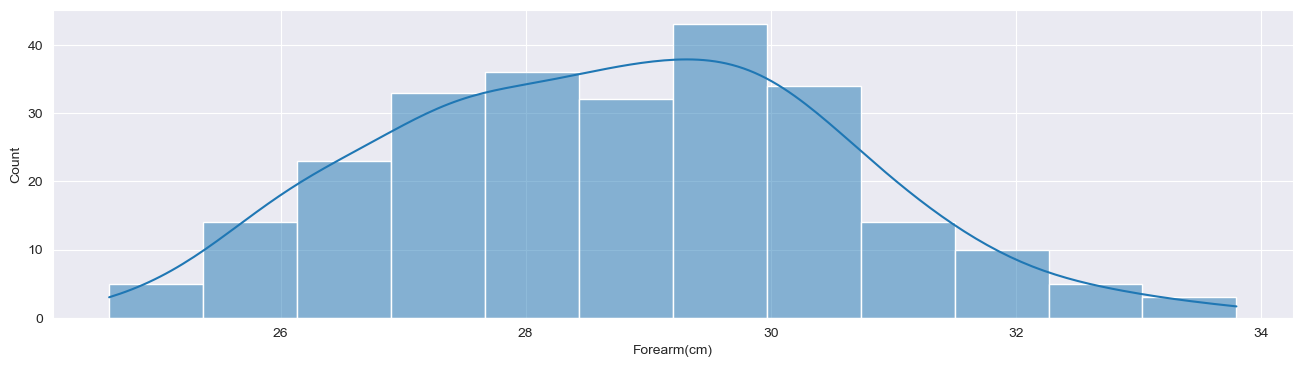

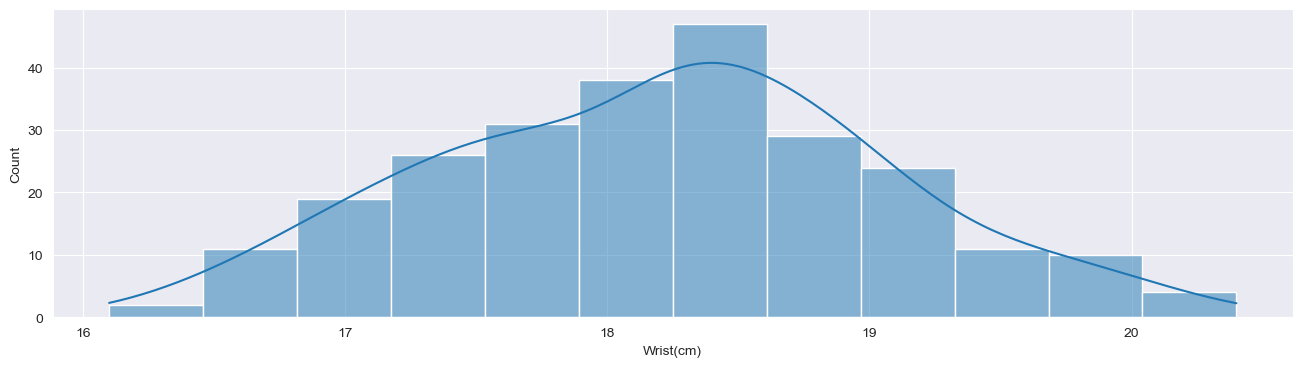

In [13]:
# Some histograms to get an idea of the distribution as well. Mostly normally distributed, but some columns are skewed.
for column in df:
    plt.figure(figsize=(16,4))
    sns.histplot(df[column], x=df[column], kde=True)
plt.show()

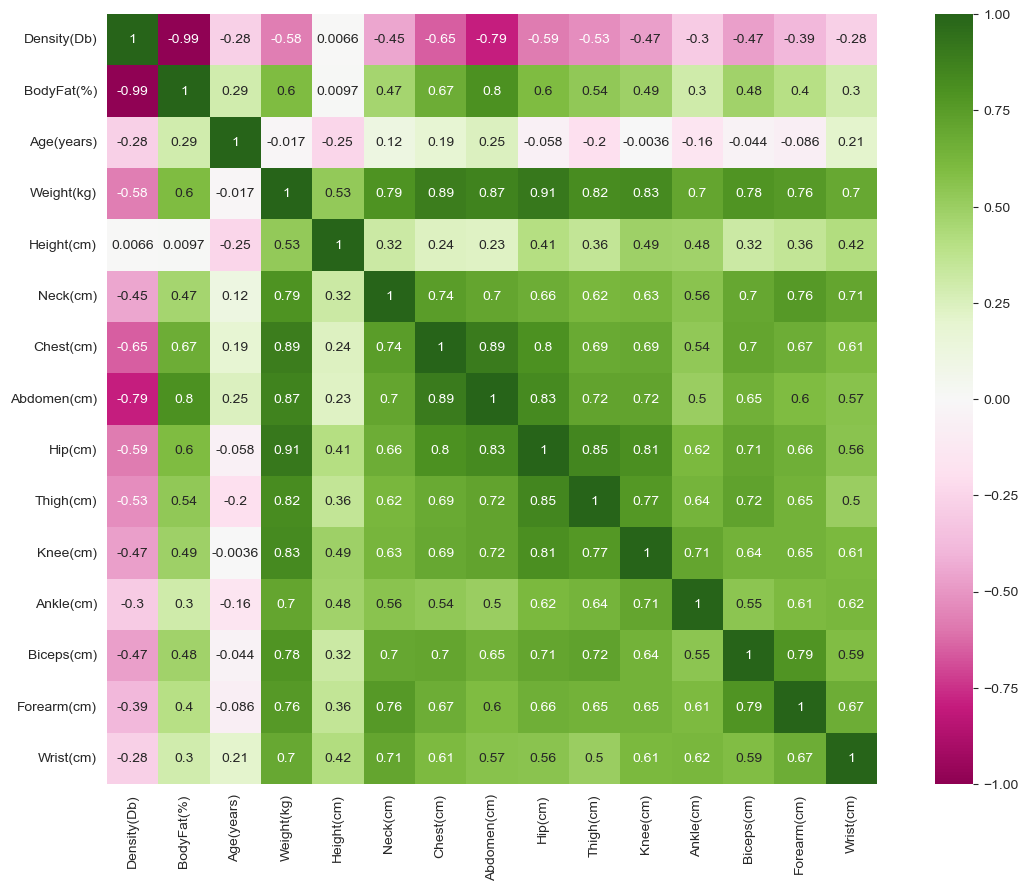

In [14]:
# Wow! I've never been so fascinated by a correlation heatmap. There is a lot to take in here, I'll highlight a few. Before this I'll address that there is clear multi-collinearity.

# 1.Body fat percentage and body density are almost perfectly negatively correlated, which is expected as the former is derived from the latter. An insight that can be drawn from the inverse relationship is that having a higher body fat percentage means your overall body density is lower. This would make sense as fat is less dense than any other tissue in the body, and by having more of it would mean that your overall body density would decrease.

# 2.The general trend of the circumference measurements is that they all tend to increase with each other, some parts of the body more than others.

# 3.There is a stronger increase of the circumference measurements with weight as opposed to circumference measurements with body fat percentage. Even though the two metrics have a strong positive correlation, having higher weight doesn't necessarily mean someone has a higher body fat percentage. This could be down to subjects that may have more muscle mass and less fat to represent that total weight.

# 4.Height seems to have weaker positive correlation with the rest of the circumference measurements, and practically no correlation with body fat percentage. This is likely attributed to the fact that taller people tend to be larger in their proportions e.g. It wouldn't make sense for someone who is nearly 7ft tall to have size 3 feet.

# 5.Abdomen circumference and body density are strongly negatively correlated, much more so than any other feature. This follows what has already been documented in the way males distribute fat around their body. Larger abdomen size and lower density implies that there is more fat localised around the abdomen than any other body part, which is absolutely expected for males.

# 6.I think the varying results for age is very fascinating as it shows how male bodies change with age. Generally, younger males are taller, have smaller torso's, lower body fat percentage, higher body density and larger thighs. Older males are shorter, will have larger torso's, higher body fat percentage, with lower body density and smaller thighs. If you build up a picture comparing the bodies of a young man and an older gentleman it would make sense that the young man would be expected to be taller, slimmer and more toned, while the older gentleman is expected to be shorter, have more of a belly and have skinnier legs.

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True,cmap='PiYG', vmin=-1,vmax=1, center=0, square=True)
plt.show()

<Figure size 1500x1000 with 0 Axes>

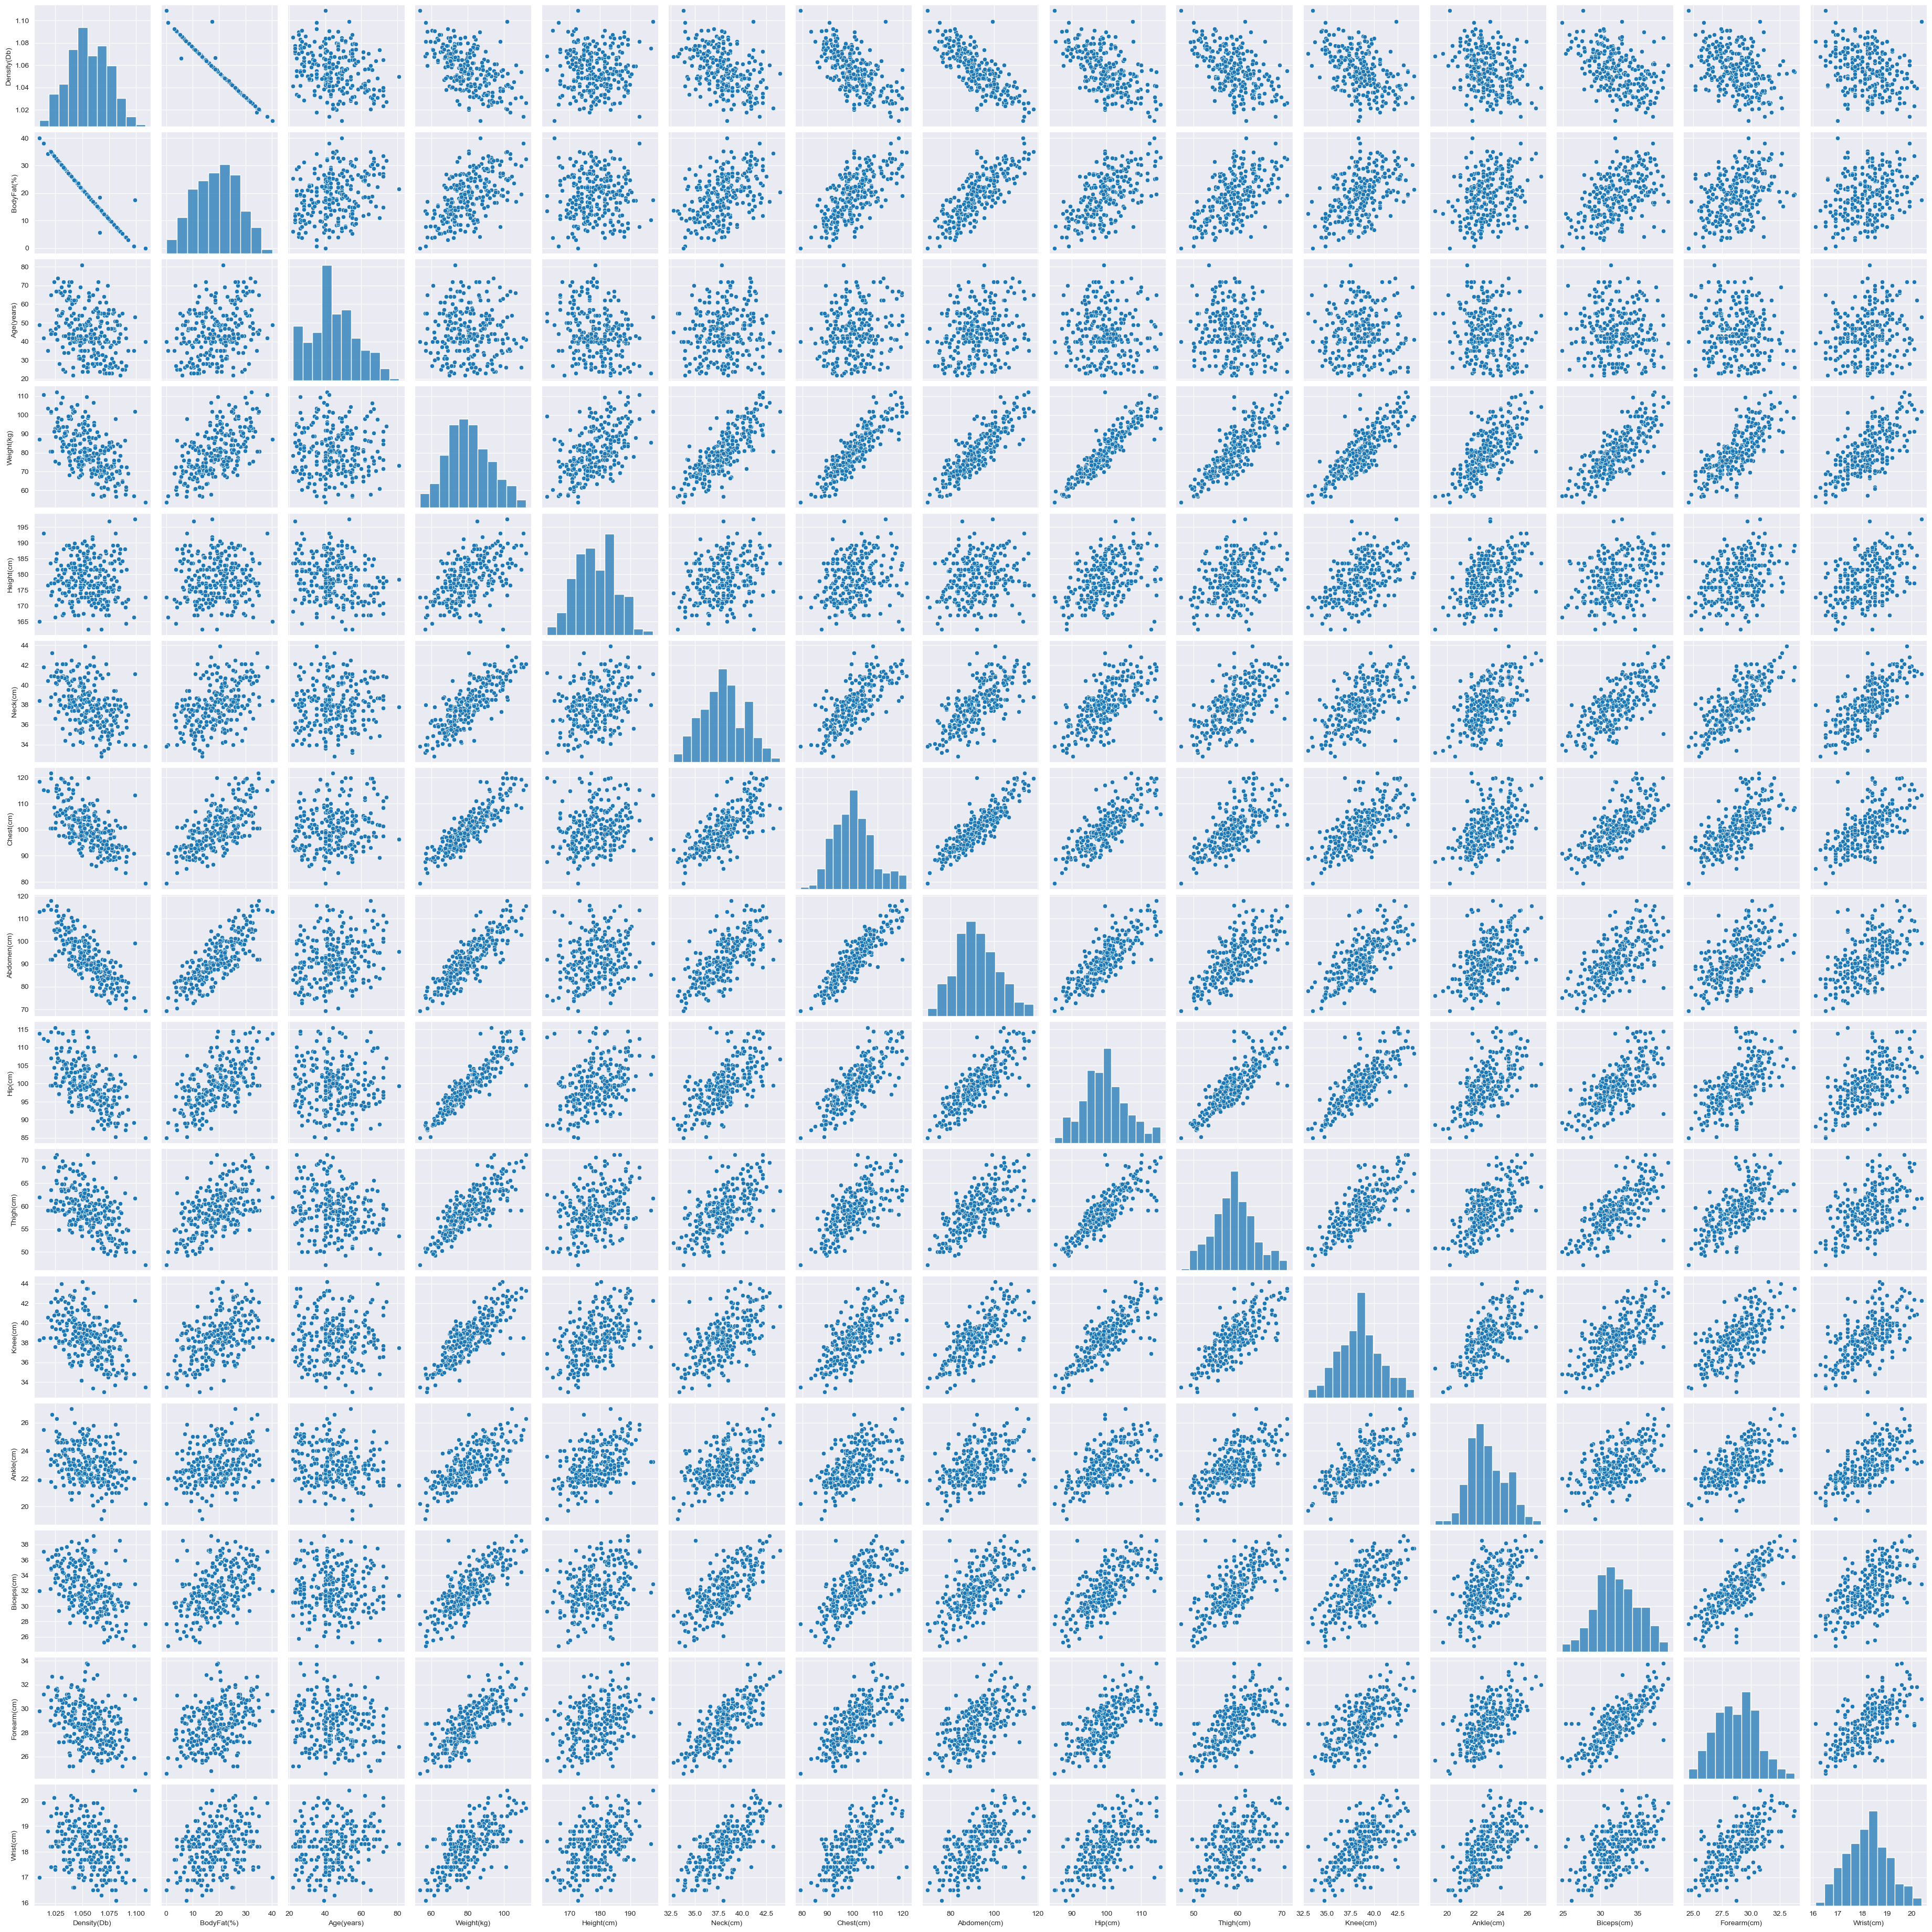

In [15]:
# Some clear linear relationships, however mostly completely scattered.
plt.figure(figsize=(15,10))
sns.pairplot(df)
plt.show()

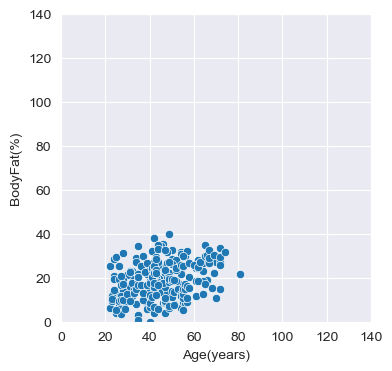

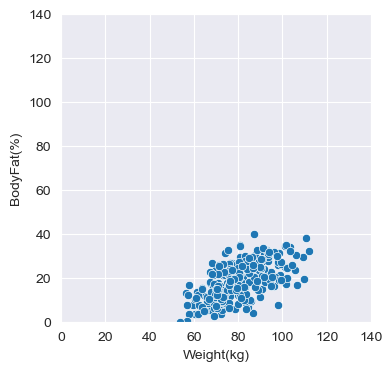

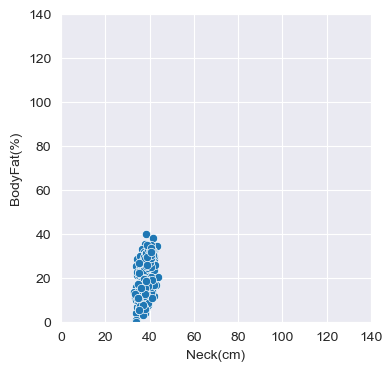

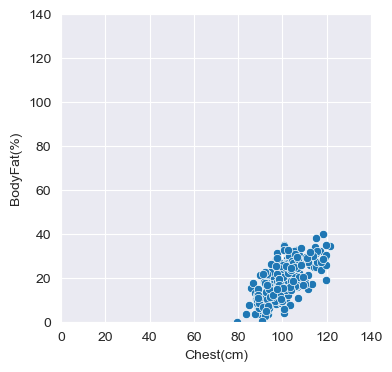

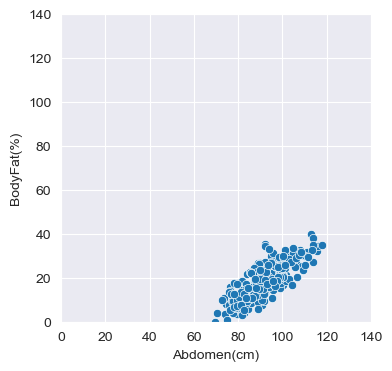

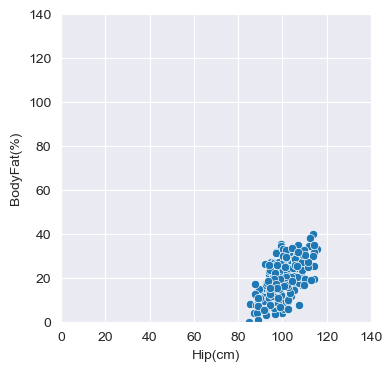

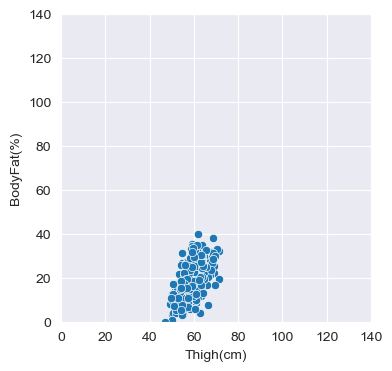

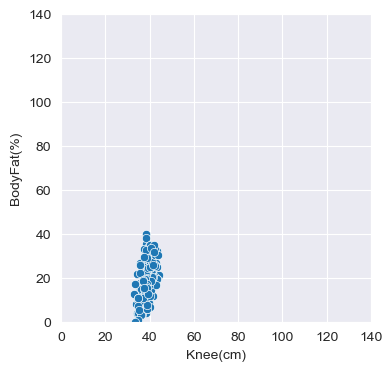

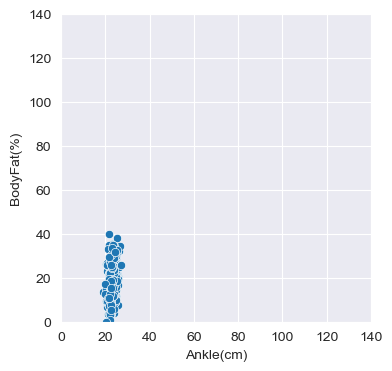

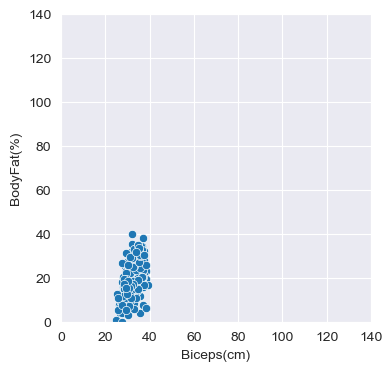

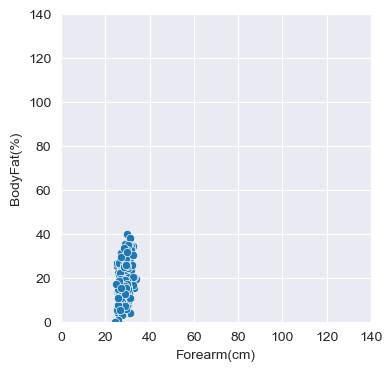

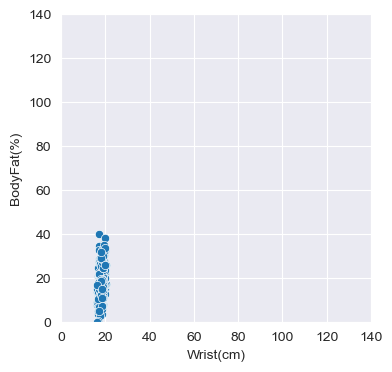

In [16]:
# Checking for linear relationship between BodyFat(%) and other features. I didn't include Density as a feature as it relates to BodyFat(%) by an equation, so even though the correlation is almost perfect it won't be useful for our model. I dropped height as a feature as there was practically no correlation with BodyFat(%).
# Quite a lot of these features don't seem to have a strong relationship at all with BodyFat(%).
df2 = df.drop(columns=['Density(Db)', 'BodyFat(%)', 'Height(cm)'])
for column in df2:
    plt.figure(figsize=(4,4))
    ax = sns.scatterplot(data=df2, x=column, y=df['BodyFat(%)'])
    ax.set_xlim([0, 140])
    ax.set_ylim([0, 140])
plt.show()

## 3.Feature engineering and Linear regression
Time to select our features that will help us build our basic regression model and perform a train/test split. We will also evaluate our model performance and see if we can adopt alternative methods.

In [17]:
# Extracting our feature columns. I've removed columns as I've been fine-tuning the models.
feature_cols = list(df.columns)
# Definitely remove these
feature_cols.remove('BodyFat(%)')
feature_cols.remove('Density(Db)')
feature_cols.remove('Height(cm)')

# We will play around with these
feature_cols.remove('Knee(cm)')
feature_cols.remove('Chest(cm)')
feature_cols.remove('Age(years)')
feature_cols.remove('Forearm(cm)')
feature_cols.remove('Ankle(cm)')
#feature_cols.remove('Wrist(cm)')
feature_cols.remove('Biceps(cm)')
feature_cols.remove('Hip(cm)')

In [18]:
# Import modules we need for train/test split.
import statsmodels.api as sm
import statsmodels.tools
from sklearn.model_selection import train_test_split

In [19]:
# X and y to be split
X = df[feature_cols]
X = sm.add_constant(X)
y = df['BodyFat(%)']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [20]:
# Initialising and fitting
lin_reg = sm.OLS(y_train, X_train)
results = lin_reg.fit()

# Add our prediction column to dataframe.
df['y_pred'] = results.predict(X)
df

Density(Db)  BodyFat(%)  Age(years)  Weight(kg)  Height(cm)  Neck(cm)  \
0         1.0708        12.3        23.0   69.966623     172.085      36.2   
1         1.0853         6.1        22.0   78.584878     183.515      38.5   
2         1.0414        25.3        22.0   69.853225     168.275      34.0   
3         1.0751        10.4        26.0   83.801190     183.515      37.4   
4         1.0340        28.7        24.0   83.574394     180.975      34.4   
..           ...         ...         ...         ...         ...       ...   
247       1.0736        11.0        70.0   60.894776     170.180      34.9   
248       1.0236        33.6        72.0   91.172066     177.165      40.9   
249       1.0328        29.3        72.0   84.708375     167.640      38.9   
250       1.0399        26.0        72.0   86.522745     179.070      38.9   
251       1.0271        31.9        74.0   94.120417     177.800      40.8   

     Chest(cm)  Abdomen(cm)  Hip(cm)  Thigh(cm)  Knee(cm)  Ankle(cm)  \
0         93.1         85.2     94.5       59.0      37.3       21.9   
1         93.6         83.0     98.7       58.7      37.3       23.4   
2         95.8         87.9     99.2       59.6      38.9       24.0   
3        101.8         86.4    101.2       60.1      37.3       22.8   
4         97.3        100.0    101.9       63.2      42.2       24.0   
..         ...          ...      ...        ...       ...        ...   
247       89.2         83.6     88.8       49.6      34.8       21.5   
248      108.5        105.0    104.5       59.6      40.8       23.2   
249      111.1        111.5    101.7       60.3      37.3       21.5   
250      108.3        101.3     97.8       56.0      41.6       22.7   
251      112.4        108.5    107.1       59.3      42.2       24.6   

     Biceps(cm)  Forearm(cm)  Wrist(cm)     y_pred  
0          32.0         27.4  17.100000  16.552397  
1          30.5         28.9  18.200000  10.984645  
2          28.8         25.2  16.600000  19.651639  
3          32.4         29.4  18.200000  12.949073  
4          32.2         27.7  17.700000  26.701687  
..          ...          ...        ...        ...  
247        25.6         25.7  18.500000  13.923204  
248        35.2         28.6  20.100000  26.474597  
249        31.3         27.2  18.000000  37.016765  
250        30.5         29.4  19.800000  23.794138  
251        33.7         30.0  18.203226  31.547213  

[252 rows x 16 columns]

In [21]:
# Our R-squared value is 0.729. We have exceeded the target and just about touched on distinction!
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             BodyFat(%)   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     98.25
Date:                Wed, 05 Apr 2023   Prob (F-statistic):           2.37e-51
Time:                        14:35:07   Log-Likelihood:                -587.60
No. Observations:                 201   AIC:                             1187.
Df Residuals:                     195   BIC:                             1207.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -36.2178     10.602     -3.416      0.001     -57.128     -15.308
Weight(kg)     -0.2573      0.078     -3.318      0.001      -0.410      -0.104
Neck(cm)        0.1174      0.248      0.473      0.637      -0.372       0.607
Abdomen(cm)     0.9492      0.065     14.501      0.000       0.820       1.078
Thigh(cm)       0.1488      0.120      1.241      0.216      -0.088       0.385
Wrist(cm)      -1.3525      0.572     -2.364      0.019      -2.481      -0.224
==============================================================================
Omnibus:                        0.823   Durbin-Watson:                   1.673
Prob(Omnibus):                  0.663   Jarque-Bera (JB):                0.944
Skew:                           0.115   Prob(JB):                        0.624
Kurtosis:                       2.756   Cond. No.                     4.71e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
# We will add the column that predicts BodyFat(%) of the train data.
X_train['y_pred'] = results.predict(X_train)
X_train

const  Weight(kg)  Neck(cm)  Abdomen(cm)  Thigh(cm)  Wrist(cm)     y_pred
136    1.0   75.636528      37.0         86.1       58.8       17.1  16.012161
55     1.0   89.811289      39.9        100.0       57.2       18.9  23.227262
204    1.0  101.151099      40.9        113.9       63.5       17.4  36.586960
216    1.0   67.698661      34.8         81.1       53.8       17.8  11.359582
147    1.0   93.666824      40.9        100.5       68.4       18.4  25.169647
..     ...         ...       ...          ...        ...        ...        ...
106    1.0   90.831872      38.6        102.8       61.2       18.1  27.146842
14     1.0   85.161967      40.5         96.4       69.0       18.2  23.778743
92     1.0   74.956139      37.5         83.1       56.9       18.4  11.357476
179    1.0  106.480809      42.8        104.5       69.5       19.9  24.027808
102    1.0   78.358082      36.3         89.2       60.0       18.4  16.592647

[201 rows x 7 columns]

In [23]:
# And now we shall evaluate rmse.
rmse = statsmodels.tools.eval_measures.rmse(y_train, X_train['y_pred'])
print(rmse)

4.501649304154089


In [24]:
# We will now repeat this with the test data.
X_test['y_pred'] = results.predict(X_test)
X_test

const  Weight(kg)   Neck(cm)  Abdomen(cm)  Thigh(cm)  Wrist(cm)  \
165    1.0   98.429544  40.500000    95.100000  64.800000  19.400000   
6      1.0   82.100219  36.400000    90.700000  58.400000  17.700000   
111    1.0   83.120802  37.100000   105.000000  63.700000  17.400000   
172    1.0   80.399248  38.400000    90.300000  57.800000  17.700000   
115    1.0   71.667594  36.300000    86.600000  55.900000  17.300000   
183    1.0   72.234585  35.300000    86.800000  58.000000  17.400000   
199    1.0   77.450897  37.400000    89.700000  58.500000  18.800000   
235    1.0   76.543712  38.300000    95.600000  54.400000  18.300000   
9      1.0   89.924687  42.100000    88.600000  63.100000  19.200000   
30     1.0   82.553811  38.700000    88.700000  57.500000  18.400000   
60     1.0   97.975952  41.400000   104.800000  61.600000  20.200000   
218    1.0   90.378280  39.400000   100.000000  63.900000  19.200000   
226    1.0   76.883907  37.200000    91.100000  56.600000  18.800000   
159    1.0   80.399248  36.200000    92.400000  59.400000  18.200000   
68     1.0   70.420215  37.500000    78.400000  56.000000  18.100000   
148    1.0   65.203903  35.200000    76.500000  51.900000  16.900000   
196    1.0   70.873808  35.500000    86.000000  57.700000  17.400000   
15     1.0   73.822158  36.400000    92.800000  63.100000  16.900000   
101    1.0   78.811674  37.000000    92.000000  59.300000  17.000000   
24     1.0   68.605846  34.500000    76.300000  58.400000  17.600000   
86     1.0   71.554196  37.700000    88.100000  57.200000  18.800000   
19     1.0   96.048184  40.000000   100.500000  65.800000  18.200000   
117    1.0   81.193034  41.000000    90.000000  56.800000  19.500000   
124    1.0   73.028372  37.700000    84.100000  58.500000  18.000000   
33     1.0   99.109933  39.800000   100.500000  67.100000  18.700000   
242    1.0  106.254013  41.400000   109.000000  63.700000  19.500000   
186    1.0  105.573624  41.900000   109.300000  67.700000  20.000000   
219    1.0   70.080021  37.600000    88.700000  53.700000  17.100000   
10     1.0   84.481579  38.500000    83.600000  59.700000  18.500000   
162    1.0   83.574394  40.700000    92.100000  64.000000  19.700000   
140    1.0   80.172451  37.400000    93.100000  59.100000  16.600000   
96     1.0   85.615560  37.500000    91.600000  60.600000  18.500000   
125    1.0   75.749926  36.600000    89.900000  60.700000  17.600000   
82     1.0   86.295948  39.300000    97.800000  58.900000  19.000000   
213    1.0   88.337114  39.000000    97.600000  60.000000  19.000000   
25     1.0   72.234585  35.700000    79.700000  55.000000  17.700000   
109    1.0   76.430314  34.200000    92.300000  57.500000  17.300000   
18     1.0   83.347598  38.000000    89.600000  64.200000  18.500000   
205    1.0   94.687407  41.900000    96.300000  63.300000  19.400000   
182    1.0   66.111088  35.500000    83.600000  54.100000  17.200000   
67     1.0   70.193419  36.900000    86.600000  54.300000  18.700000   
132    1.0   89.357697  37.800000    99.800000  61.200000  17.900000   
156    1.0   93.326630  38.500000   105.000000  68.600000  19.100000   
143    1.0   72.461381  35.500000    77.100000  56.100000  18.200000   
45     1.0   74.502547  35.700000    81.500000  58.400000  18.300000   
178    1.0   84.935171  38.000000    92.700000  64.700000  18.100000   
16     1.0   88.790706  38.900000    96.400000  64.800000  17.300000   
66     1.0   68.719244  35.600000    83.900000  55.000000  17.400000   
142    1.0   75.749926  37.500000    91.000000  57.100000  17.900000   
175    1.0   65.884292  36.000000    79.400000  50.300000  16.900000   
38     1.0   80.672401  37.992771    92.079116  59.125806  18.203226   

        y_pred  
165  16.883789  
6    17.774169  
111  32.361393  
172  17.977598  
115  16.723771  
183  16.827505  
199  16.665631  
235  22.671232  
9    13.107441  
30   14.948462  
60   24.755318  
218  23.613635  
226  17.834256  
159  19.274448  
68   

In [25]:
# And finally the rmse of the test data. The value has decreased, our model is learning!
rmse = statsmodels.tools.eval_measures.rmse(y_test, X_test['y_pred'])
print(rmse)

4.27446270360565


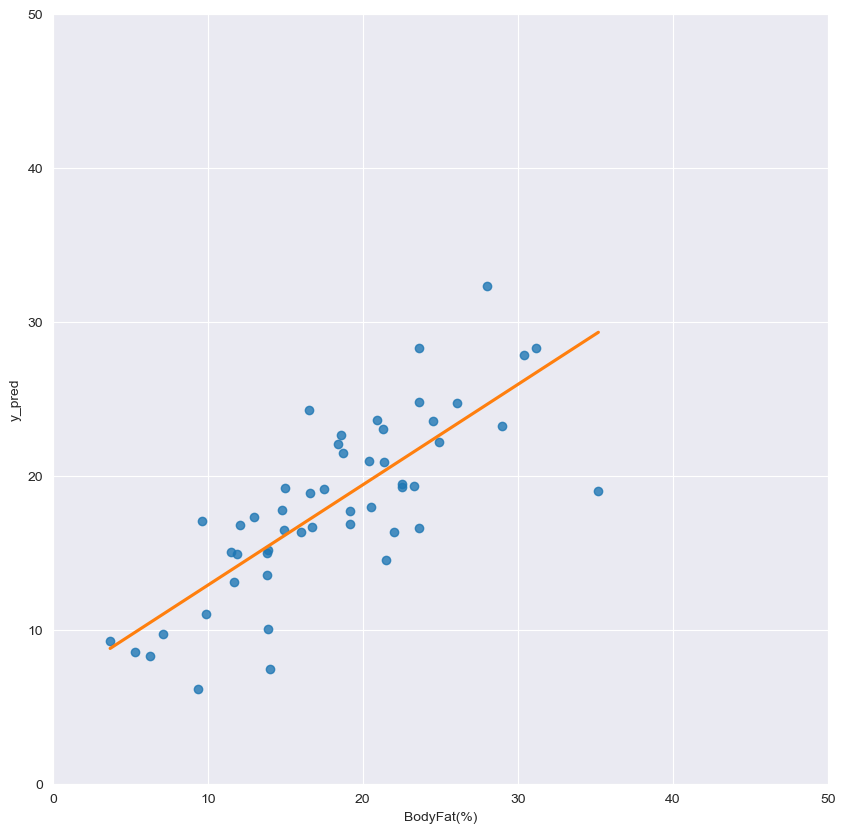

In [26]:
# Plotting our test results.
plt.figure(figsize=(10,10))
ax = sns.regplot(data=X_test, x=y_test, y='y_pred', scatter=True, ci=None, line_kws={"color": "C1"})
ax.set_xlim([0, 50])
ax.set_ylim([0, 50])
plt.show()

In [27]:
# Let's evaluate how much multi-collinearity is affecting our model.
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

      variable          VIF
0        const  1086.945562
1   Weight(kg)     8.860613
2     Neck(cm)     3.119077
3  Abdomen(cm)     4.077436
4    Thigh(cm)     3.226661
5    Wrist(cm)     2.316689


## 4.Decision tree regression

Let's try a different method. Decision tree regression should help handle multi-collinearity as it splits the data based on the most informative input variables.

In [28]:
# The necessary modules.
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [29]:
# Train test/split again
X = df[feature_cols]
y = df['BodyFat(%)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [30]:
# Fitting our model.
dt = DecisionTreeRegressor(max_depth=4, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [31]:
y_pred = dt.predict(X_test)

In [32]:
# Our rmse. Higher than what we got before.
rmse = statsmodels.tools.eval_measures.rmse(y_test, y_pred)
print(rmse)

4.417595554196987


In [33]:
# Our R-squared score. significantly lower than what we get before.
r2_score(y_test,y_pred)

0.5804823697167284

In [34]:
# Feature importance ranking.
importances = dt.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. Abdomen(cm) (0.881610)
2. Weight(kg) (0.051562)
3. Wrist(cm) (0.024086)
4. Thigh(cm) (0.023665)
5. Neck(cm) (0.019077)


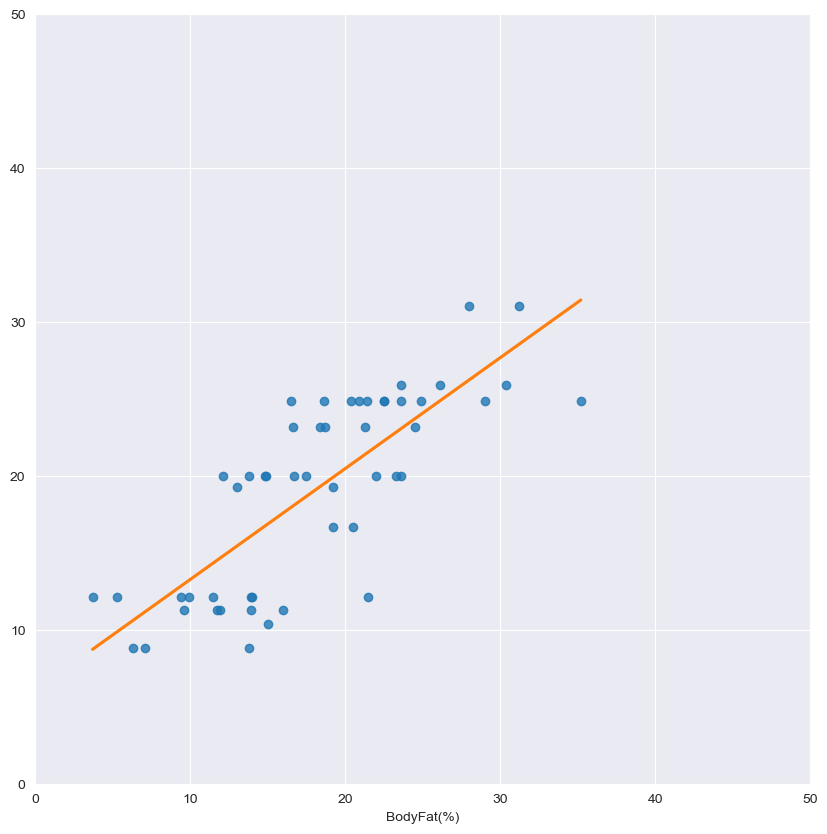

In [35]:
# Plotting our test results. This is a lot more scattered than the linear regression model.
plt.figure(figsize=(10,10))
ax = sns.regplot(x=y_test, y=y_pred, scatter=True, ci=None, line_kws={"color": "C1"})
ax.set_xlim([0, 50])
ax.set_ylim([0, 50])
plt.show()

In [36]:
# There seems to be quite a bit of variation in our R squared scores, indicating overfitting.
dt_scores = cross_val_score(dt, X_train, y_train, cv=5, scoring='r2')
print("Decision Tree CV R-squared scores:", dt_scores)

Decision Tree CV R-squared scores: [0.54193891 0.59494543 0.40230945 0.59875977 0.54440415]


## 5.Random forest regression

I wasn't so happy with the results from decision tree regression. Maybe we can make a more powerful model using random forest.

In [37]:
# Import necessary module.
from sklearn.ensemble import RandomForestRegressor

In [38]:
# Fitting our model. I carried out a gridsearch earlier and found that these were the best hyperparameters.
rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=42)

In [39]:
from sklearn.model_selection import GridSearchCV
rf_params = {
    'n_estimators': [100, 150, 200, 250, 300], ## Number of trees to use! 3 options
    'max_depth': [None, 1, 2, 3, 4, 5, 6, 7], ## Allow 6 options
}

# Apply the cross validated gridsearch on rf
gs = GridSearchCV(rf, verbose=1, param_grid=rf_params, cv=5)

# Fit the gridsearch result on train
gs.fit(X_train, y_train)

# Print out the best score
print(gs.best_score_)

gs.best_params_

Fitting 5 folds for each of 40 candidates, totalling 200 fits
0.6520470595723046


{'max_depth': 5, 'n_estimators': 100}

In [40]:
y_pred = rf.predict(X_test)

In [41]:
# Better than decision tree, not as good as linear regression.
rmse = statsmodels.tools.eval_measures.rmse(y_test, y_pred)
print(rmse)

4.252786258886773


In [42]:
# Better than decision tree but nowhere near as good as linear regression.
r2_score(y_test,y_pred)

0.6112007446947003

In [43]:
# Still some variation here.
rf_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='r2')
print("Random Forest CV R-squared scores:", rf_scores)

Random Forest CV R-squared scores: [0.62411621 0.75373001 0.51675144 0.67756555 0.68807208]


In [44]:
# Feature importance ranking.
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. Abdomen(cm) (0.826847)
2. Weight(kg) (0.053838)
3. Wrist(cm) (0.043800)
4. Neck(cm) (0.041396)
5. Thigh(cm) (0.034118)


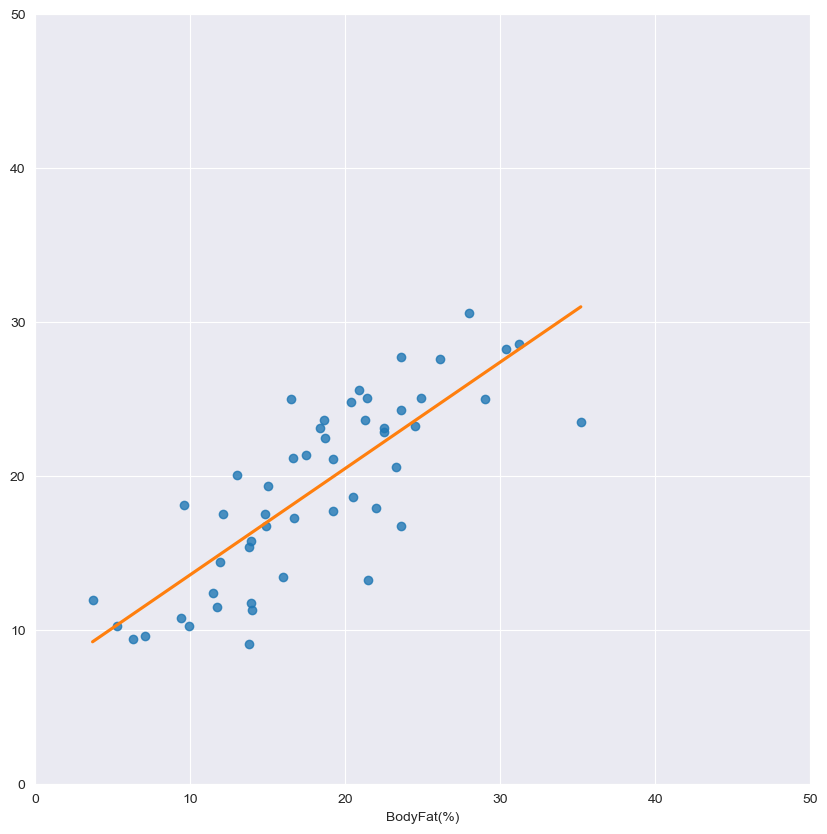

In [45]:
# Our test results visualized.
plt.figure(figsize=(10,10))
ax = sns.regplot(x=y_test, y=y_pred, scatter=True, ci=None, line_kws={"color": "C1"})
ax.set_xlim([0, 50])
ax.set_ylim([0, 50])
plt.show()

In [46]:
# I made a dataframe that labels how removing each feature affects each model.
pd.read_csv('Feature selection.csv')

Feature Linear Regression Decision Tree Random Forest
0     Bicep             Worse        Better        Better
1       Hip               NaN        Better        Better
2    Weight             Worse         Worse         Worse
3   Abdomen             Worse         Worse         Worse
4     Chest            Better           NaN        Better
5   Forearm             Worse           NaN        Better
6     Ankle             Worse           NaN        Better
7     Wrist             Worse        Better         Worse
8     Thigh             Worse         Worse         Worse
9      Knee               NaN        Better        Better
10     Neck             Worse         Worse         Worse
11      Age               NaN           NaN        Better

After some careful consideration I have decided to opt for the Linear Regression model. My reason for this is that it has a significantly higher R-squared score than the other models and the rmse is generally low, meaning that it would be the most powerful model to predict BodyFat percentage. I was hesitant to opt for this model as there was a risk of multi-collinearity, however with the appropriate feature selection I was able to create a model that had low VIF scores while maintaining a high R-squared score, indicating low multi-collinearity.

Decision tree and random forest by nature are good at handling multi-collinearity, however they are very greedy models and can over-fit easily. Their R-squared score could come nowhere near that of the Linear Regression model.

## 6.Creating GUI

In [47]:
# Before building the GUI, I wanted to see how the model handles my own personal data that I collected at home.
# I will start by creating a dataframe of the relevant features.
evren = pd.DataFrame()
evren['const'] = [1.0]
evren['Weight(kg)'] = [78.1]
evren['Neck(cm)'] = [38.0]
evren['Abdomen(cm)'] = [92.4]
evren['Thigh(cm)'] = [49.0]
evren['Wrist(cm)'] = [16.5]
evren

const  Weight(kg)  Neck(cm)  Abdomen(cm)  Thigh(cm)  Wrist(cm)
0    1.0        78.1      38.0         92.4       49.0       16.5

In [49]:
# I know that my observed body fat percentage is 21%. Based on this result the error was roughly 0.17%, which I believe to be acceptable.
results.predict(evren)

0    20.829362
dtype: float64

In [61]:
# It's GUI time. I will create a function that asks the user for their name, weight, neck circumference, Abdomen circumference, Thigh circumference, and wrist circumference. Once all data has been inputted, the function will return a dataframe containing their name, their measurements, and their body fat percentage.
# I'm taking it from the top so that anyone that wants to try this out doesn't have to do all the cleaning and feature engineering that I had to do. Will also put a link to the dataframe on GitHub so that it doesn't require downloading.
def body_fat_percentage():
    # Necessary modules.
    import numpy as np
    import pandas as pd

    # Reading in our dataframe.
    df = pd.read_csv('bodyfat.csv')

    # Converting to metric system.
    df['Weight'] = df['Weight']*0.45359237
    df['Height'] = df['Height']*2.54

    # Relabeling columns.
    df = df.rename(columns={'BodyFat':'BodyFat(%)','Age':'Age(years)','Weight':'Weight(kg)','Density':'Density(Db)'})
    for column in df.iloc[:,4:15]:
        df = df.rename(columns={column:column+'(cm)'})

    # Our function to clean outliers.
    def clean_outliers(df):
        df_clean = df.copy()
        for column in df:
            q1, q3 = np.percentile(df[column],[25,75])
            IQR = q3 - q1
            upper = q3 + 1.5*IQR
            lower = q1 - 1.5*IQR
            df_clean[column] = np.where((df[column] < lower) | (df[column] > upper), np.nan, df[column])
            mean = df_clean[column].mean()
            df_clean[column] = df_clean[column].fillna(mean)
        return df_clean

    # Applying cleaning function.
    df = clean_outliers(df)

    # Extracting our feature columns.
    feature_cols = list(df.columns)
    # Columns that we don't need. Rather than dropping these columns from the beginning, I chose to remove them at feature engineering stage so that if there is more training data available in the future, we can test how that will impact our model through feature engineering.
    # These need to go regardless.
    feature_cols.remove('BodyFat(%)')
    feature_cols.remove('Density(Db)')
    # These may change in the future.
    feature_cols.remove('Height(cm)')
    feature_cols.remove('Knee(cm)')
    feature_cols.remove('Chest(cm)')
    feature_cols.remove('Age(years)')
    feature_cols.remove('Forearm(cm)')
    feature_cols.remove('Ankle(cm)')
    feature_cols.remove('Biceps(cm)')
    feature_cols.remove('Hip(cm)')

    # Import modules we need for train/test split.
    import statsmodels.api as sm
    from sklearn.model_selection import train_test_split

    # X and y to be split
    X = df[feature_cols]
    X = sm.add_constant(X)
    y = df['BodyFat(%)']

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

    # Initialising and fitting.
    lin_reg = sm.OLS(y_train, X_train)
    results = lin_reg.fit()

    # Our inputs.
    name = input('What is your name?')
    weight = float(input('What is your weight in kg?'))
    neck = float(input('What is your neck circumference in cm?'))
    abdomen = float(input('What is your abdomen circumference in cm?'))
    thigh = float(input('What is your thigh circumference in cm?'))
    wrist = float(input('What is your wrist circumference in cm?'))

    # Making and formatting the dataframe we wish the function to return.
    obs = pd.DataFrame()
    obs['const'] = [1.0]
    obs['Weight(kg)'] = [weight]
    obs['Neck(cm)'] = [neck]
    obs['Abdomen(cm)'] = [abdomen]
    obs['Thigh(cm)'] = [thigh]
    obs['Wrist(cm)'] = [wrist]
    obs['BodyFat(%)'] = results.predict(obs)
    obs['Name'] = [name]
    obs.insert(0,'Name',obs.pop('Name'))
    obs = obs.drop(columns='const')

    # Finally returning the dataframe with our results
    return obs

In [62]:
# Let's test it out. Great success!
body_fat_percentage()

Name  Weight(kg)  Neck(cm)  Abdomen(cm)  Thigh(cm)  Wrist(cm)  BodyFat(%)
0  Evren        78.1      38.0         92.4       49.0       16.5   20.829362

## 7.Limitations
There were two clear limitations to this project; The dataset was very small and was only collected from male subjects.

This dataset consists of 15 separate columns, each of which contains a wide range of continuous values. This would mean that there would be a large number of possible values for each column and that a large number of observations would be necessary to be representative of the population. The dataset had only 252 observations, which is insufficiently large to be considered at all representative. Without adequate representation, our model would not be robust and would have low accuracy if there were patterns in the observations that the model could not recognise.
To get around this, significantly more training data would need to be collected, until a robust model is satisfied.

While the model would work well with data from men, it's possible that results from data from women wouldn't be accurate. Body fat is distributed differently between men and women, therefore any patterns we may notice in the characteristics from the male sample could not be applicable to the female data.
The solution would be to gather information on females and implement a second model that can predict female body fat percentage. By asking the user to specify their gender, a single function that runs the appropriate model can be used to combine the two models.

## 8.Conclusion
